<a href="https://colab.research.google.com/github/hemanth0914/Natural-Language-Processing/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis(EDA)


In [1]:
import pandas as pd

In [3]:
sms=pd.read_table('/content/SMSSpamCollection',header=None)



In [4]:
print(sms)

         0                                                  1
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
sms.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
sms.describe()

,0,1
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
y=sms[0]
y.value_counts()

ham     4825
spam     747
Name: 0, dtype: int64

In [8]:
from sklearn import preprocessing

In [9]:
le=preprocessing.LabelEncoder()
y_enc=le.fit_transform(y)

In [10]:
y_enc

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
raw_text=sms[1]


In [12]:
raw_text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: 1, Length: 5572, dtype: object

In [13]:
pd.isnull(sms)

,0,1
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [14]:
import matplotlib as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
sms.columns=['label','msg']
sms['length']=sms['msg'].apply(len)

In [16]:
sms.head()

,label,msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


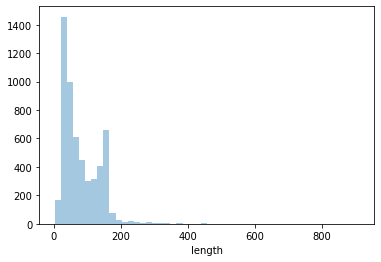

In [19]:
sns.distplot(sms['length'],kde=False)

Preprocessing

In [20]:
sms.sample(frac=0.05)

,label,msg,length
3506,ham,"life alle mone,eppolum oru pole allalo",38
3766,spam,Someone U know has asked our dating service 2 ...,137
965,ham,Are you this much buzy,22
4341,ham,I want to sent &lt;#&gt; mesages today. Thats...,66
4697,ham,A guy who gets used but is too dumb to realize...,50
...,...,...,...
1016,ham,"Dear,regret i cudnt pick call.drove down frm c...",124
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35
1232,ham,have got * few things to do. may be in * pub l...,51
2558,spam,This message is brought to you by GMW Ltd. and...,70


In [21]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [24]:
!pip install contractions

     |████████████████████████████████| 245kB 3.7MB/s 
     |████████████████████████████████| 317kB 6.7MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81691 sha256=52eda36a1bb31f19bd5b4c92d6b3484a890502cf1ea4140b49f41f7b91157009
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [26]:
import contractions

In [31]:
sms['no_contract']=sms['msg'].apply(lambda x: [contractions.fix(word)for word in x.split()])

In [32]:
sms.head()

,label,msg,length,no_contract
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he..."


In [39]:
sms['msg_string']=[' '.join(map(str,l)) for l in sms['no_contract']]

In [40]:
sms.head()

,label,msg,length,no_contract,msg_string
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar..."


In [41]:
sms['tokenized']=sms['msg_string'].apply(word_tokenize)

In [42]:
sms.head()

,label,msg,length,no_contract,msg_string,tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,..."


In [43]:
!pip install pyspellchecker

     |████████████████████████████████| 1.9MB 2.6MB/s 


In [49]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [51]:
sms['pos_tags']=sms['no_contract'].apply(nltk.tag.pos_tag)
sms.head()

,label,msg,length,no_contract,msg_string,tokenized,pos_tags
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[(Go, NNP), (until, IN), (jurong, JJ), (point,..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[(Ok, NNP), (lar..., VBZ), (Joking, NNP), (wif..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[(Free, JJ), (entry, NN), (in, IN), (2, CD), (..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[(you, PRP), (dun, VBP), (say, VB), (so, RB), ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[(Nah, NNP), (I, PRP), (do not, VBP), (think, ..."


In [59]:
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
def get_word_pos(tag):
  if tag.startswith('J'):
    return wordnet.ADJ
  elif tag.startswith('V'):
    return wordnet.VERB
  elif tag.startswith('R'):
    return wordnet.ADV
  elif tag.startswith('N'):
    return wordnet.NOUN 
  else:
    return wordnet.NOUN       
      

In [65]:
sms['wordnet_pos']=sms['pos_tags'].apply(lambda x: [(word,get_word_pos(pos_tag))for (word,pos_tag) in x])
sms.head()

,label,msg,length,no_contract,msg_string,tokenized,pos_tags,wordnet_pos
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[(Go, NNP), (until, IN), (jurong, JJ), (point,...","[(Go, n), (until, n), (jurong, a), (point,, n)..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[(Ok, NNP), (lar..., VBZ), (Joking, NNP), (wif...","[(Ok, n), (lar..., v), (Joking, n), (wif, n), ..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[(Free, JJ), (entry, NN), (in, IN), (2, CD), (...","[(Free, a), (entry, n), (in, n), (2, n), (a, n..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[(you, PRP), (dun, VBP), (say, VB), (so, RB), ...","[(you, n), (dun, v), (say, v), (so, r), (early..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[(Nah, NNP), (I, PRP), (do not, VBP), (think, ...","[(Nah, n), (I, n), (do not, v), (think, v), (h..."


In [70]:
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()
sms['lemmatized']=sms['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word,tag) for word,tag in x])

In [71]:
sms.head()

,label,msg,length,no_contract,msg_string,tokenized,pos_tags,wordnet_pos,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[(Go, NNP), (until, IN), (jurong, JJ), (point,...","[(Go, n), (until, n), (jurong, a), (point,, n)...","[Go, until, jurong, point,, crazy.., Available..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[(Ok, NNP), (lar..., VBZ), (Joking, NNP), (wif...","[(Ok, n), (lar..., v), (Joking, n), (wif, n), ...","[Ok, lar..., Joking, wif, you, oni...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[(Free, JJ), (entry, NN), (in, IN), (2, CD), (...","[(Free, a), (entry, n), (in, n), (2, n), (a, n...","[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[(you, PRP), (dun, VBP), (say, VB), (so, RB), ...","[(you, n), (dun, v), (say, v), (so, r), (early...","[you, dun, say, so, early, hor..., you, c, alr..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[(Nah, NNP), (I, PRP), (do not, VBP), (think, ...","[(Nah, n), (I, n), (do not, v), (think, v), (h...","[Nah, I, do not, think, he, go, to, usf,, he, ..."


In [80]:
sms['lower']=sms['tokenized'].apply(lambda x: [word.lower()for word in x])
sms.head()

,label,msg,length,no_contract,msg_string,tokenized,pos_tags,wordnet_pos,lemmatized,lower
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[(Go, NNP), (until, IN), (jurong, JJ), (point,...","[(Go, n), (until, n), (jurong, a), (point,, n)...","[Go, until, jurong, point,, crazy.., Available...","[go, until, jurong, point, ,, crazy.., availab..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[(Ok, NNP), (lar..., VBZ), (Joking, NNP), (wif...","[(Ok, n), (lar..., v), (Joking, n), (wif, n), ...","[Ok, lar..., Joking, wif, you, oni...]","[ok, lar, ..., joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[(Free, JJ), (entry, NN), (in, IN), (2, CD), (...","[(Free, a), (entry, n), (in, n), (2, n), (a, n...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[(you, PRP), (dun, VBP), (say, VB), (so, RB), ...","[(you, n), (dun, v), (say, v), (so, r), (early...","[you, dun, say, so, early, hor..., you, c, alr...","[you, dun, say, so, early, hor, ..., you, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[(Nah, NNP), (I, PRP), (do not, VBP), (think, ...","[(Nah, n), (I, n), (do not, v), (think, v), (h...","[Nah, I, do not, think, he, go, to, usf,, he, ...","[nah, i, do, not, think, he, goes, to, usf, ,,..."


In [86]:
import string
punc= string.punctuation
sms['no_punc']=sms['lower'].apply(lambda x: [word for word in x if word not in punc])
sms.head()

,label,msg,length,no_contract,msg_string,tokenized,pos_tags,wordnet_pos,lemmatized,lower,no_punc
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[(Go, NNP), (until, IN), (jurong, JJ), (point,...","[(Go, n), (until, n), (jurong, a), (point,, n)...","[Go, until, jurong, point,, crazy.., Available...","[go, until, jurong, point, ,, crazy.., availab...","[go, until, jurong, point, crazy.., available,..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[(Ok, NNP), (lar..., VBZ), (Joking, NNP), (wif...","[(Ok, n), (lar..., v), (Joking, n), (wif, n), ...","[Ok, lar..., Joking, wif, you, oni...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[(Free, JJ), (entry, NN), (in, IN), (2, CD), (...","[(Free, a), (entry, n), (in, n), (2, n), (a, n...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[(you, PRP), (dun, VBP), (say, VB), (so, RB), ...","[(you, n), (dun, v), (say, v), (so, r), (early...","[you, dun, say, so, early, hor..., you, c, alr...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[(Nah, NNP), (I, PRP), (do not, VBP), (think, ...","[(Nah, n), (I, n), (do not, v), (think, v), (h...","[Nah, I, do not, think, he, go, to, usf,, he, ...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he..."


In [77]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
stop_words=set(stopwords.words('english'))

In [88]:
sms['stopwords_removed']=sms['no_punc'].apply(lambda x:[word for word in x if word not in stop_words])
sms.head()

,label,msg,length,no_contract,msg_string,tokenized,pos_tags,wordnet_pos,lemmatized,lower,no_punc,stopwords_removed
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...","Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[(Go, NNP), (until, IN), (jurong, JJ), (point,...","[(Go, n), (until, n), (jurong, a), (point,, n)...","[Go, until, jurong, point,, crazy.., Available...","[go, until, jurong, point, ,, crazy.., availab...","[go, until, jurong, point, crazy.., available,...","[go, jurong, point, crazy.., available, bugis,..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, you, oni...]",Ok lar... Joking wif you oni...,"[Ok, lar, ..., Joking, wif, you, oni, ...]","[(Ok, NNP), (lar..., VBZ), (Joking, NNP), (wif...","[(Ok, n), (lar..., v), (Joking, n), (wif, n), ...","[Ok, lar..., Joking, wif, you, oni...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, you, oni, ...]","[ok, lar, ..., joking, wif, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[(Free, JJ), (entry, NN), (in, IN), (2, CD), (...","[(Free, a), (entry, n), (in, n), (2, n), (a, n...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[you, dun, say, so, early, hor..., you, c, alr...",you dun say so early hor... you c already then...,"[you, dun, say, so, early, hor, ..., you, c, a...","[(you, PRP), (dun, VBP), (say, VB), (so, RB), ...","[(you, n), (dun, v), (say, v), (so, r), (early...","[you, dun, say, so, early, hor..., you, c, alr...","[you, dun, say, so, early, hor, ..., you, c, a...","[you, dun, say, so, early, hor, ..., you, c, a...","[dun, say, early, hor, ..., c, already, say, ...]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do not, think, he, goes, to, usf,, he...","Nah I do not think he goes to usf, he lives ar...","[Nah, I, do, not, think, he, goes, to, usf, ,,...","[(Nah, NNP), (I, PRP), (do not, VBP), (think, ...","[(Nah, n), (I, n), (do not, v), (think, v), (h...","[Nah, I, do not, think, he, go, to, usf,, he, ...","[nah, i, do, not, think, he, goes, to, usf, ,,...","[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives, around, though]"


In [90]:
sms.to_csv('sms_spam_collection.csv')